In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

#### Function and Gradient Definations
#### The hessian of the functions is given by:
$$\begin{bmatrix} 2 & -1 \\ -1 & 2*\gamma \end{bmatrix}$$

In [157]:
def function(x, y, l):
    return x * x + l * y * y - x * y - x - y

def gradientFunction(x, y, l):
    dx = 2 * x - y - 1
    dy = 2 * l * y - x - 1
    return (dx, dy)

#### Class defination of Gradient Descent:
  - Precision - $1 \times 10^{-12}$
  - Starting Point - $(0, 0)$
  - Maximum Iterations - 100000

In [260]:
class GradientDescent2D:
    def __init__(self, f, gradF, stepSize, l):
        
        # Init Functions
        self.f = f
        self.gradF = gradF
        self.stepSize = stepSize
        self.stopVal = 0.000000000001
        self.l = l
        
        self.x = 0
        self.y = 0
    
    def moveOneStep(self):
        grad = self.gradF(self.x, self.y, self.l)
        self.x -= self.stepSize * grad[0]
        self.y -= self.stepSize * grad[1]
        
    def diffGrad(self, a, b):
        try:
            return ((a[0] - b[0]) ** 2  + (a[1] - b[1]) ** 2) ** (0.5)
        except:
            return 0
        
    def descent(self):
        # returns the error at each iterations
        Error = []
        
        while True:
            
            prevF = self.f(self.x, self.y, self.l)
            prevGrad = self.gradF(self.x, self.y, self.l)
            self.moveOneStep()
            currF = self.f(self.x, self.y, self.l)
            currGrad = self.gradF(self.x, self.y, self.l)
            
            Error.append(abs(prevF - currF))
            
            if abs(prevF - currF) < self.stopVal:
                break
            
            if len(Error) > 1e5:
                # Taking Too Long to converge
                break
        
        return Error
    
    def getPoint(self):
        return (self.x, self.y)

In [261]:
# Create Instance of class
gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, 1)

In [262]:
Error = gradientDescent.descent()
print(gradientDescent.getPoint())

(0.9999980931625188, 0.9999980931625188)


#### Point returned is $\approx$ (1, 1)

In [263]:
iteration = np.linspace(1, len(Error), len(Error))

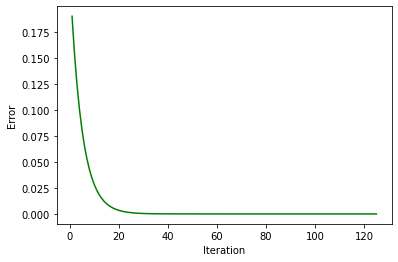

In [264]:
plt.plot(iteration, Error, 'g')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

#### Observations
  - After $\approx$ 30 iterations the error remains almost the same
  - Error is decreasing, therefore, after each iteration the value is changing less and less

## 1.2
  - 20 steps sizes are chosen from the range $[0, 2]$
  - Values are not chosen randomly to make their plot with iterations meaningful

In [220]:
stepSizes = np.linspace(0.1, 1.9, 20)

In [221]:
iterationReq = []

for step in stepSizes:
    gradientDescent = GradientDescent2D(function, gradientFunction, step, 1)
    error = gradientDescent.descent()
    iterationReq.append(len(error))

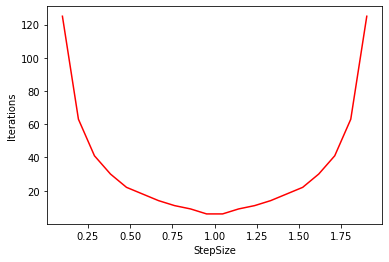

In [222]:
plt.plot(stepSizes, iterationReq, 'r')
plt.xlabel('StepSize')
plt.ylabel('Iterations')
plt.show()

 - Iterations decreases as StepSize moves away from 0, achieves its minimum value around 1, and then starts to increase again
 - The plot appears to be convex in nature
 - Too Large/Too Small Step size gives high amounts to iterations

### 1.3
  - 5 values are chosen for $\gamma$ from the range $[0.5, 1]$
  - Values are not chosen randomly to make their plot with iterations meaningful

In [234]:
gamma = np.linspace(0.5, 1, 5)
iterationRequired = []

for l in gamma:
    gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, l)
    error = gradientDescent.descent()
    iterationRequired.append(len(error))

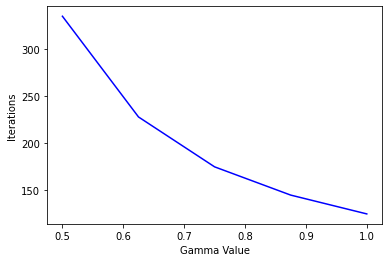

In [235]:
plt.plot(gamma, iterationRequired, 'b')
plt.xlabel('Gamma Value')
plt.ylabel('Iterations')
plt.show()

### We cab see that an increase in gamma leads a decrease in iterations required to converge, this can be attributed to that fact that hessian increases as $\gamma$ increases and therefore the steps size are larger for points away from the minimum.

# Part 2

In [203]:
gradientDescent = GradientDescent2D(function, gradientFunction, 0.1, -1)
Error = gradientDescent.descent()
iteration = np.linspace(1, len(Error), len(Error))

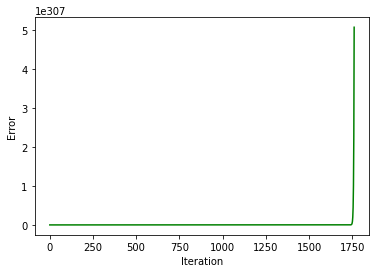

In [204]:
plt.plot(iteration, Error, 'g')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

#### Observing that nature of the function at $\gamma = -1$
  - We can see that the descent does not converage and the error increase steeply after some iterations
  - The hessian of function when $\gamma = -1$ is given by:
  $$\begin{bmatrix} 2 & -1 \\ -1 & -2 \end{bmatrix}$$
  - The above hessian is indefinite in nature and the functions at $\gamma = -1$ is not convex in nature